# Linear Regression

## Univariate linear regression

The code below generates a synthetic training dataset assuming that the response y is a linear function of an attribute x. This is referred to as a generative model.

Complete the code to determine the the optimal linear regression coefficients for the data that minimizes mean square error using (1) analytical expression we learned in class; and (2) using the "polyfit" and "polyval" functions from the numpy.polynomial.polynomial class.


### Generate Data

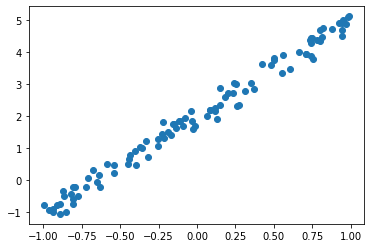

In [2]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

nsamp = 100;
wstd = 0.2;
beta = np.array([2,3])

# Training data points
xd = np.random.uniform(-1,1,nsamp)
y0 = poly.polyval(xd,beta)
yd = y0 + np.random.normal(0,wstd,nsamp)

fig, ax = plt.subplots()
ax.scatter(xd, yd)

### Analytical Model

**Q1**: Complete the code below using closed form expressions for $\beta_0, \beta_1$.

In [3]:
#Analytical model
beta1 = 3
beta0 = 2
analyticalModel = np.array([beta0,beta1])

### Evaluate Your Model

**Q2**: Obtain predictions from your analytical model for randomly generated inputs. Next use the in-built polyfit function to do the same. 

**Analytical Model Result**

In [4]:
#evaluate your model

# new data
xplot = np.random.uniform(-1,1,nsamp)

# prediction
ypredict = poly.polyval(xplot,analyticalModel)


**Polyfit Model Prediction**

In [5]:
polyfitModel = poly.polyfit(xd, yd,1)
yfit = poly.polyval(xplot,polyfitModel)

### Plot Result

**Q3**: Plot results of polyfit model and analytical model. The plots should contain both the (x,y) training data points and the fitted lines.

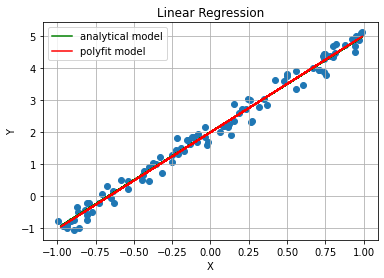

In [6]:
#plot your results
fig, ax = plt.subplots()
ax.scatter(xd, yd)

# Plot polyfit model and analytical model result:
# Your Code
ax.plot(xplot, ypredict,'g')
ax.plot(xplot, yfit,'r')
ax.legend(['analytical model', 'polyfit model'])

ax.set(xlabel='X', ylabel='Y',
       title='Linear Regression')
ax.grid()
plt.show()

## Application of Linear Regression

In this part, you'll use Linear Regression on a real-world dataset. The datatset contains sales number of a product versus the advertising of the product on TV, radio and newspaper. The question we want to ask is how advertising on each of these channels impacts sales.

### Read Data

**Q4**: Split data into train and test, by reserving **70** percent of the data for training and the rest for test. 

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
url = 'https://www.statlearning.com/s/Advertising.csv'
df = pd.read_csv(url, index_col=0)
df.head()

train, test = train_test_split(df, test_size=0.3)

In [8]:
y_train = train['sales']

### Linear Regression Model

**Q5**: Use linear regression model to describe sales as a linear function  of advertising on TV, newspaper, and radio. That is, you should independently regress sales against advertising on each of these media.

In [9]:
sales_TV_beta     = poly.polyfit(train['TV'], y_train,1)
sales_newspaper_beta  = poly.polyfit(train['radio'], y_train,1)
sales_radio_beta    = poly.polyfit(train['newspaper'], y_train,1)

### Plot Data

**Q6**: Use the models to do prediction and plot *test* data points and predctions of 3 models

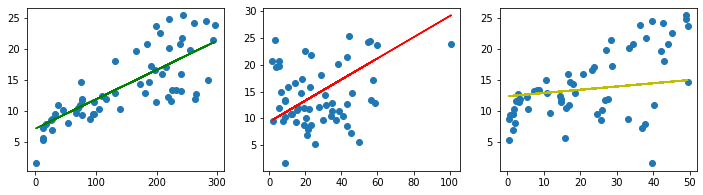

In [10]:
fig = plt.figure(figsize=(12,3))
y_test = test['sales']

## Sales to TV spend
plt.subplot(1,3,1)
x_test_TV = test['TV']
y_test_TV = poly.polyval(x_test_TV, sales_TV_beta)

plt.scatter(x_test_TV, y_test)
plt.plot(x_test_TV, y_test_TV,'g')

## Sales to newspaper spend
plt.subplot(1,3,2)
x_test_newspaper = test['newspaper']
y_test_newspaper = poly.polyval(x_test_newspaper, sales_newspaper_beta)

plt.scatter(x_test_newspaper, y_test)
plt.plot(x_test_newspaper, y_test_newspaper,'r')

## Sales to radio spend
plt.subplot(1,3,3)
x_test_radio = test['radio']
y_test_radio = poly.polyval(x_test_radio, sales_radio_beta)

plt.scatter(x_test_radio, y_test)
plt.plot(x_test_radio, y_test_radio,'y')


## Multivariate Linear Regression

**Q7**: Use all three features ('TV', 'Radio', newspaper') to predict sales using multivariate linear regression.

In [43]:

# Define training X matrix
X = np.vstack((np.ones(train['newspaper'].size), train['newspaper'], train['radio'], train['TV']))
trainX = X.transpose()

# Define training Y matrix
trainY = train['sales']

# Get your Model(Using the closed form in class)
multivariate_beta = np.dot(np.linalg.inv(np.dot(X, trainX)), np.dot(trainY,trainX)) # beta = (XTX)^-1XTY

### Evaluate Model

**Q8**: use your multivariate model to do predictions on test data

In [59]:
# Define testing X matrix
X = np.vstack((np.ones(test['newspaper'].size), test['newspaper'], test['radio'], test['TV']))
testX = X.transpose()

# Define testing Y matrix
testY = test['sales']

# Predcit result using your model multivariate_beta
pred = np.dot(testX, multivariate_beta)

### Plot Result

**Q9**: Plot your predictions against real labels.

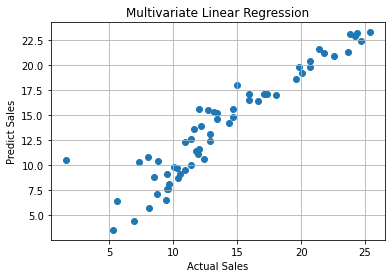

In [58]:
fig, ax = plt.subplots()

# Your Code
ax.scatter(testY, pred)

ax.set(xlabel='Actual Sales', ylabel='Predict Sales',
       title='Multivariate Linear Regression')
ax.grid()
plt.show()